In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('../combined-csv-files.csv', encoding='latin1')

In [4]:
df.head()

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam


In [5]:
# Deleting S. No.
df.drop('S. No.', axis=1, inplace=True)

In [6]:
df.head()

,Message_body,Label
0,"UpgrdCentre Orange customer, you may now claim...",Spam
1,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,Congrats! Nokia 3650 video camera phone is you...,Spam
3,URGENT! Your Mobile number has been awarded wi...,Spam
4,Someone has contacted our dating service and e...,Spam


In [7]:
# using .describe to check out the overview of the df
df.describe()

,Message_body,Label
count,1082,1082
unique,1064,2
top,"Sorry, I'll call later",Non-Spam
freq,4,884


In [8]:
# the same as above but group be labels
df.groupby('Label').describe()

Message_body         \
                count unique   
Label                          
Non-Spam          884    872   
Spam              198    192   

                                                                  
                                                        top freq  
Label                                                             
Non-Spam                             Sorry, I'll call later    4  
Spam      Congratulations ur awarded 500 of CD vouchers ...    2

In [10]:
# create message length columns
df['length'] = df['Message_body'].apply(len)
df.head()

,Message_body,Label,length
0,"UpgrdCentre Orange customer, you may now claim...",Spam,175
1,"Loan for any purpose £500 - £75,000. Homeowner...",Spam,162
2,Congrats! Nokia 3650 video camera phone is you...,Spam,157
3,URGENT! Your Mobile number has been awarded wi...,Spam,136
4,Someone has contacted our dating service and e...,Spam,162


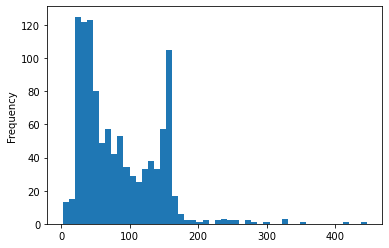

In [11]:
df['length'].plot(bins=50, kind='hist')

In [13]:
df.length.describe()

count    1082.000000
mean       82.896488
std        56.441110
min         2.000000
25%        37.000000
50%        66.500000
75%       132.000000
max       446.000000
Name: length, dtype: float64

In [15]:
# check out the longest message
df[df['length'] == 446]['Message_body'].iloc[0]

'A Boy loved a gal. He propsd bt she didnt mind. He gv lv lttrs, Bt her frnds threw thm. Again d boy decided 2 aproach d gal , dt time a truck was speeding towards d gal. Wn it was about 2 hit d girl,d boy ran like hell n saved her. She asked \'hw cn u run so fast?\' D boy replied "Boost is d secret of my energy" n instantly d girl shouted "our energy" n Thy lived happily 2gthr drinking boost evrydy Moral of d story:- I hv free msgs:D;): gud ni8'

Text(0.5, 0, 'message length')

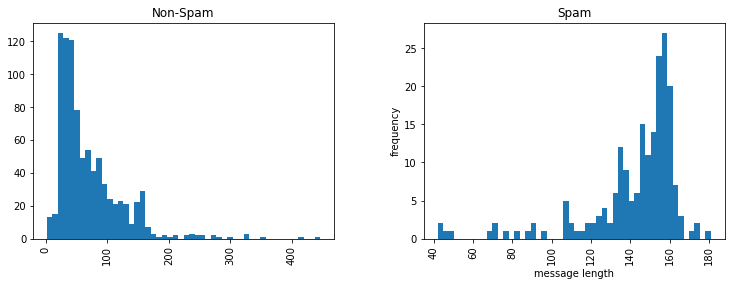

In [18]:
# check out the message length based on the label
df.hist(column='length', by='Label', bins=50,figsize=(12,4))
plt.ylabel('frequency')
plt.xlabel('message length')